In [2]:
import functools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import kplr
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table

import sys
# sys.path.append('./') #1
import analysis_tools_cython as tools

%matplotlib notebook

In [2]:
kic = kplr.API()
kic.data_root = '../lc'

In [3]:
star = kic.star(3542116)
lcs = star.get_light_curves()

i = np.where(tools.d2q(1176) == np.array([l.sci_data_quarter for l in lcs]))[0][0]
print(i, lcs[i].filename)
_ = lcs[i].open() # force download

12 ../lc/data/lightcurves/003542116/kplr003542116-2012088054726_llc.fits


Filename: /home/astro/phsxfz/storage/tess/lc/S9/tess2019058134432-s0009-0000000140031673-0139-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   18187R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (25, 25)   int32   

(1543.2201454586047, 0.0022659907, 227349, nan, nan, nan, nan, nan, nan, 2080, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)

name:
    ['TIME', 'TIMECORR', 'CADENCENO', 'SAP_FLUX', 'SAP_FLUX_ERR', 'SAP_BKG', 'SAP_BKG_ERR', 'PDCSAP_FLUX', 'PDCSAP_FLUX_ERR', 'QUALITY', 'PSF_CENTR1', 'PSF_CENTR1_ERR', 'PSF_CENTR2', 'PSF_CENTR2_ERR', 'MOM_CENTR1', 'MOM_CENTR1_ERR', 'MOM_CENTR2', 'MOM_CENTR2_ERR', 'POS_CORR1', 'POS_CORR2']
format:
    ['D', 'E', 'J', 'E', 'E', 'E', 'E', 'E', 'E', 'J', 'D', 'E', 'D', 'E', 'D', 'E', 'D', 'E', 'E', 'E']
unit:
    ['BJD - 2457000, days', 'd', '', 'e-/s', 'e-/s', 

<IPython.core.display.Javascript object>


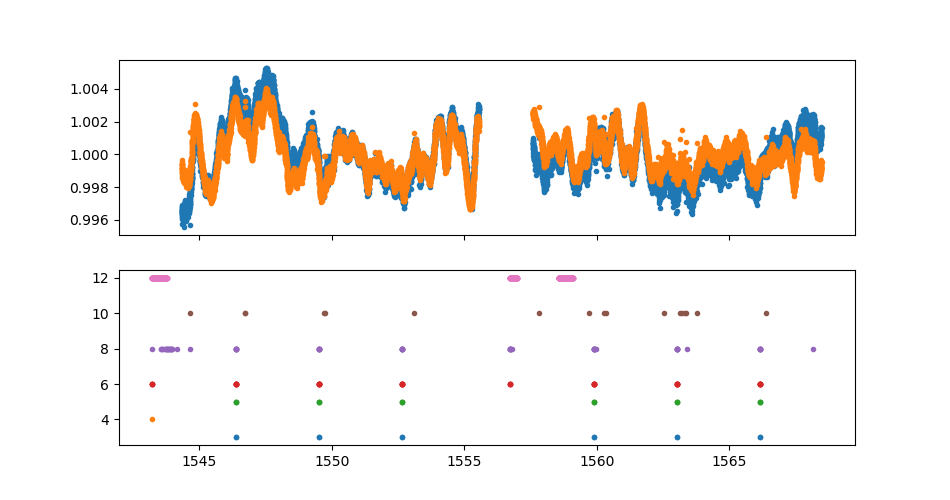

In [15]:
""""Files for Beta Pic, number indicates sector in which data was taken"""

filename4 = ("../data/beta_pic_data/MAST_2019-06-19T0624-Beta_Pic-Sector_4//TESS/tess2018292075959-s0004-0000000270577175-0124-s/" 
             "tess2018292075959-s0004-0000000270577175-0124-s_lc.fits") 
filename5 = ("../data/beta_pic_data/MAST_2019-06-19T0822-Beta_Pic-Sector_5//TESS/tess2018319095959-s0005-0000000270577175-0125-s/" 
             "tess2018319095959-s0005-0000000270577175-0125-s_lc.fits") 
filename6 = ("../data/beta_pic_data/MAST_2019-06-19T0832-Beta_Pic-Sector_6//TESS/tess2018349182459-s0006-0000000270577175-0126-s/" 
             "tess2018349182459-s0006-0000000270577175-0126-s_lc.fits") 
filename7 = ("../data/beta_pic_data/MAST_2019-06-19T1029-Beta_Pic-Sector_7//TESS/tess2019006130736-s0007-0000000270577175-0131-s/" 
             "tess2019006130736-s0007-0000000270577175-0131-s_lc.fits") #2

filename_S4_1 = ("../data/S4_pot/tess2018292075959-s0004-0000000200386263-0124-s_lc.fits") 
filename_S4_2 = ("../data/S4_pot/tess2018292075959-s0004-0000000279135413-0124-s_lc.fits") 
filename_S4_3 = ("../data/S4_pot/tess2018292075959-s0004-0000000453101438-0124-s_lc.fits") 
filename_roar = ("/home/astro/phsxfz/storage/tess/lc/S4/tess2018292075959-s0004-0000000150359982-0124-s_lc.fits")

filename_G = ("/home/astro/phsxfz/storage/tess/lc/S6/tess2018349182459-s0006-0000000255640115-0126-s_lc.fits")

filename_what = ("/home/astro/phsxfz/storage/tess/lc/S9/tess2019058134432-s0009-0000000140031673-0139-s_lc.fits")

filename_pt1 = ("/home/astro/phsxfz/storage/tess/lc/S7/tess2019006130736-s0007-0000000278897282-0131-s_lc.fits")

hdulist = fits.open(filename_what)
hdulist.info() #3
print("") #3 
scidata = hdulist[1].data 
print(scidata[1]) #3 
print("") #3 
table = Table(scidata)['TIME','SAP_FLUX','PDCSAP_FLUX','QUALITY']

cols = hdulist[1].columns #3 
cols.info() #3 
print("") #3

fig, ax = plt.subplots(2, figsize=(9.5,5), sharex=True) 
ax[0].plot(table['TIME'], table['SAP_FLUX']/np.nanmean(table['SAP_FLUX']), '.') 
ax[0].plot(table['TIME'], table['PDCSAP_FLUX']/np.nanmean(table['PDCSAP_FLUX']), '.')

q_ind = tools.get_quality_indices(table['QUALITY']) 
for j,ind in enumerate(q_ind): 
    if len(ind) > 0: 
        ax[1].plot(table['TIME'][ind], np.zeros(len(ind))+j+1, '.')

dip = 0

In [12]:
q_ind
for i,q in enumerate(q_ind):
    if len(q)>0:
        print(i+1)

3
4
5
6
8
10


<IPython.core.display.Javascript object>


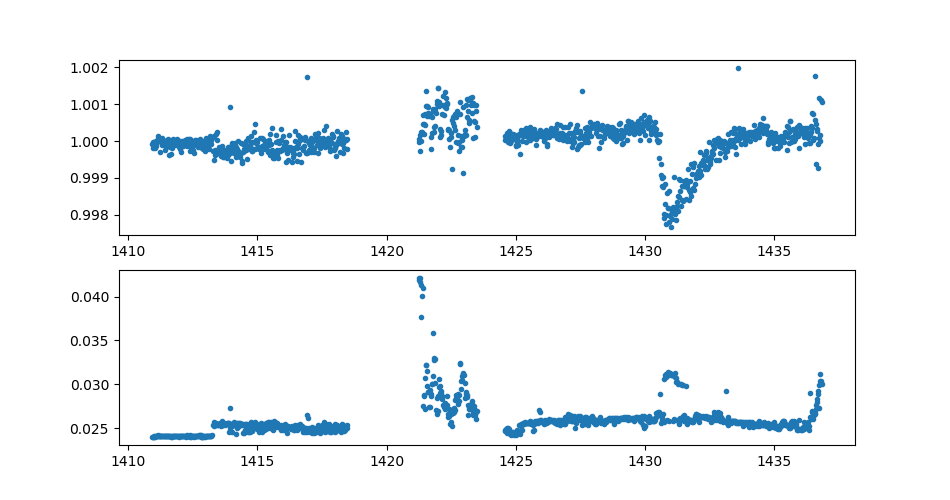

In [18]:
'''Opening a full frame image for TESS'''                            #8
filename_FFI1 = ("../FFI/S4_1_data/10006613_sector04_1_2.lc")
filename_FFI2 = ("/home/astro/phsxfz/storage/tess/ffi-lc/S4/lc/clean/348897123_sector04_4_4.lc")

# FFI_file = open(filename_FFI1)
# FFI_info = FFI_file.readlines()

# Time = [row.split(' ')[0] for row in FFI_info]
# Flux = [row.split(' ')[1] for row in FFI_info]
# Extra = [row.split(' ')[2] for row in FFI_info]

# time = np.asarray(Time).astype(np.float)
# flux = np.asarray(Flux).astype(np.float)
# extra = np.asarray(Extra).astype(np.float)

# for i in range(len(Time)):
#     print(Time[i], Flux[i], Extra[i])

# FFI_file.close()

# fig, ax = plt.subplots(2, figsize=(9.5,5), sharex=False) 
# ax[0].plot(Time, flux/np.nanmean(flux), '.')

data = np.loadtxt(filename_FFI2)

fig, ax = plt.subplots(2, figsize=(9.5,5), sharex=False) 
ax[0].plot(data[:,0], data[:,1]/np.nanmean(data[:,1]), '.')
ax[1].plot(data[:,0], data[:,2], '.')

dip = 0


In [3]:
filename_FFI1 = ("../FFI/S4_1_data/10006613_sector04_1_2.lc")
data = tools.import_fullframeimage(filename_FFI1)               #9
t, flux, _, real = tools.clean_data(data) 

# print(len(t))
# for i in range(len(t)):
#     print(i, t[i], flux[i], real[i])

### plot of before/after lomb-scargle filtering of light curve, including test statistic

In [6]:
def get_lc(file, drop_bad_points=True, keep_interpolated=True, ok_flags=[]):
    '''get light curve'''
    try:
        if file.endswith('.fits'):
            table = tools.import_lightcurve(file, drop_bad_points=drop_bad_points, ok_flags=ok_flags)
            t,flux,quality,real = tools.clean_data(table)
        else:
            table = tools.import_fullframeimage(filename_FFI1) #10
            t, flux, _, real = tools.clean_data(table)  #10
            quality = None
    except:
        print("File not loaded")
        return
    
    if not keep_interpolated:
        t = t[np.array(real,dtype=bool)]
        flux = flux[np.array(real,dtype=bool)]
        quality = quality[np.array(real,dtype=bool)]
        real = real[np.array(real,dtype=bool)]
        
    timestep = tools.calculate_timestep(table)
    flux = tools.normalise_flux(flux)
    flux_ls = np.copy(flux)
    print(timestep)
    
    real_tmp = np.copy(real) #6
    real_tmp[dip] = 0 #6
    tools.lombscargle_filter(t, flux_ls, real_tmp, 0.05)
    
#     tools.lombscargle_filter2(t, flux_ls, real, 0.05, 1.5, timestep) #4
    flux_ls = flux_ls * real
    return t, timestep, flux, flux_ls, quality, real

t, timestep, flux, flux_ls, quality, real = get_lc(filename6, keep_interpolated = True)

0.00138888098263


In [7]:
'''Calculating the number of data points needed to make a width of 2.5 days''' #11
multiple = 1/(48*timestep)
data_points = int(round(60*multiple))

print(data_points)

900


In [15]:
def get_stat(flux_ls):
    '''get transit statistic'''
    T = tools.test_statistic_array(flux_ls, data_points) #5 #12
    data = tools.nonzero(T)
    m,n = np.unravel_index(T.argmin(),T.shape)
    return T, m, n

T, m, n = get_stat(flux_ls)

minT = T[m,n]
minT_time = t[n]
minT_duration = m*timestep

print(minT)
print(minT_duration)

-46.601348877
0.58610777467


In [7]:
# Compute this, then go back and rerun the filtering and test statistic
dip = slice(n-m, n+m) #6
print("n-m is:", n-m, "which is at time", t[n-m])
print("n+m is:", n+m, "which is at time", t[n+m])

n-m is: 12544 which is at time 1485.69577911
n+m is: 13388 which is at time 1486.86798997


<IPython.core.display.Javascript object>


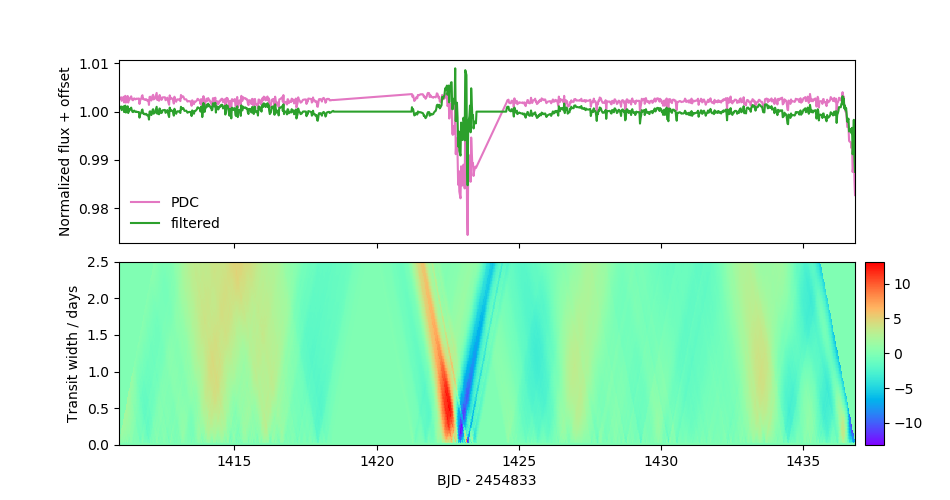

In [9]:
# need to set keep_interpolated to True for T to line up with light curve
fig, ax = plt.subplots(2, figsize=(9.5,5), sharex=True)

ax[0].plot(t, flux+1.0015, '-', color='C6', label='PDC')
ax[0].plot(t, flux_ls+1, '-', color='C2', label='filtered')
ax[0].set_xlim(np.min(t), np.max(t))
# ax[0].set_xlim(1489, 1490)
ax[0].legend(loc=3, frameon=False)
# ax[0].set_ylim(0.9985, 1.0021)

im = ax[1].imshow(T, origin='bottom', extent=ax[0].get_xlim()+(0,2.5), aspect='auto',
                  cmap='rainbow')
ax[1].set_ylim(0,2.5)

ax[0].set_ylabel('Normalized flux + offset')
ax[1].set_xlabel('BJD - 2454833')
ax[1].set_ylabel('Transit width / days')

fig.subplots_adjust(hspace=0.1)

cax = fig.add_axes([.91, ax[1].get_position().min[1], 0.02, ax[1].get_position().height])

fig.colorbar(im, cax=cax)

pos = ax[0].get_position()
pos2 = ax[1].get_position()
ax[1].set_position([pos.x0,pos2.y0,pos.width,pos2.height])

# fig.savefig('experimental_graphs/periodics_0.05precision_LS1_filteredtwice.pdf')

In [ ]:
# a nice version
fig, ax = plt.subplots(figsize=(5,3.75))
ax.plot(table['TIME'], table['SAP_FLUX']/np.nanmean(table['SAP_FLUX']), '.', color='C6', label='SAP')
ax.plot(table['TIME'], table['PDCSAP_FLUX']/np.nanmean(table['PDCSAP_FLUX']), '.', color='C4', label='PDC')
ax.plot(t, flux_ls+1, '.', color='C2', label='filtered')

ax.legend(frameon=False)
# ax.set_xlim(375,392)
# ax.set_ylim(0.997,1.004)
ax.set_ylabel('Normalized flux')
ax.set_xlabel('BJD - 2454833')

fig.tight_layout()
fig.savefig('figs/lc-before-after.pdf')

In [ ]:
fig, ax = plt.subplots(figsize=(5,3.75))

bottom = 50
hist, bins = np.histogram(T, bins=50, normed=False)
width = 0.8 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax.bar(center, hist-bottom, align='center', width=width, bottom=bottom,
       color='grey')#, edgecolor=np.repeat('grey', len(bins)))
ylim = ax.get_ylim()

p = tools.single_gaussian_curve_fit(center, hist)
print(p)
print(np.std(T))
# ax.plot(center, tools.gauss(center, p[0], p[1], np.std(T)), color='black', alpha=0.5, linewidth=2)

# ax.set_ylim(ylim[0],ylim[1]*1.2)
ax.set_yscale('log')
ax.set_xlabel('T')
ax.set_ylabel('Number')

fig.tight_layout()
fig.savefig('figs/T_hist.pdf')

### fits to a dip

In [7]:
def curve_fit(m, n, t, flux_ls, real, verb=False, cutout_half_width=5, n_m_bg_start=3, n_m_bg_end=1):
    '''get fit results'''
    asym, width1, width2 = tools.calc_shape(m,n,t,flux_ls) # uses updated defaults
    if asym == -3 or asym == -2:
        return np.repeat(None,5)
    w = cutout_half_width
    t2 = t[n-w*m:n+w*m]
    if (t2[-1]-t2[0]) / np.median(np.diff(t2)) / len(t2) > 1.5:
        print('gap in wide')
    t3 = t[int(n-m/2.):int(n+m/2.)]
    if (t3[-1]-t3[0]) / np.median(np.diff(t3)) / m > 1.5:
        print('gap near dip')
    x2 = flux_ls[n-w*m:n+w*m]
    background_level = (sum(x2[:m]) + sum(x2[(2*w-1)*m:]))/(2*m)
    bg_l1 = np.mean(x2[:n_m_bg_start*m])
    bg_t1 = np.mean(t2[:n_m_bg_start*m])
    bg_l2 = np.mean(x2[(2*w-n_m_bg_end)*m:])
    bg_t2 = np.mean(t2[(2*w-n_m_bg_end)*m:])
    grad = (bg_l2-bg_l1)/(bg_t2-bg_t1)
    background_level = bg_l1 + grad * (t2 - bg_t1)
    x2 -= background_level

    paramsgauss = tools.single_gaussian_curve_fit(t2,-x2)
    y2 = -tools.gauss(t2,*paramsgauss)
    paramscomet = tools.comet_curve_fit(t2,-x2)
    w2 = -tools.comet_curve(t2,*paramscomet)
    scores = [tools.score_fit(x2,fit) for fit in [y2, w2]]
    if verb:
        print("Asym score:",round(scores[0]/scores[1],4))
        print('Asym score:',asym)
        print(tools.classify(m, n, real, asym, paramscomet[2], paramscomet[3])) #7
        
    return t2, x2, y2, w2, asym

t2, x2, y2, w2, asym = curve_fit(m, n, t, flux_ls, real, verb=True, cutout_half_width=4)

Asym score: 0.9843
Asym score: 0.989461369132
badEgress


<IPython.core.display.Javascript object>


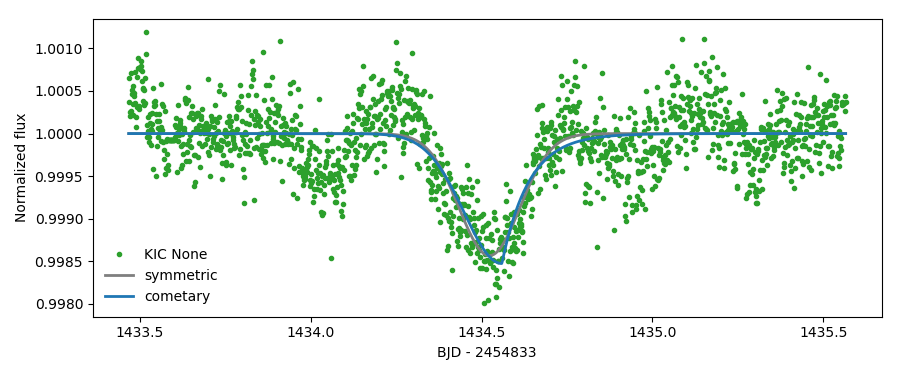

In [8]:
def show_fit(t2, x2, y2, w2, file=None, width=None, name=None, ylim=None):
    '''show fit'''
    fig, ax = plt.subplots(figsize=(9,3.75))

    ax.plot(t2, x2+1, '.', label='KIC {}'.format(name), color='C2')
#     ax.plot(t2, x2-w2+1, '.', label='KIC {}'.format(name), color='C2')
    ax.plot(t2, y2+1.0000, linewidth=2, label='symmetric', color='C7')
    ax.plot(t2, w2+1, linewidth=2, label='cometary', color='C0')
    ax.legend(frameon=False)

    ax.set_ylabel('Normalized flux')
    ax.set_xlabel('BJD - 2454833')
    
#     ax.set_xlim(1479, 1489)

    if width is not None:
        mid = (t2[-1]+t2[0])/2.
        ax.set_xlim(mid-width/2,mid+width/2)
        
    if ylim is not None:
        ax.set_ylim(ylim)
    
    fig.tight_layout()
#     if file:
#         fig.savefig(file)
        
show_fit(t2, x2, y2, w2, name=None, width=None, file='experimental_graphs/modelfits_0.05precision_LS1_filteredtwice.pdf')

### other light curves

In [ ]:
# take a closer look
def fit_one(kic_no, day, drop_bad_points=True, width=None, file=None, ylim=None):
    '''do everything'''
    star = kic.star(kic_no)
    lcs = star.get_light_curves()
    i = np.where(tools.d2q(day) == np.array([l.sci_data_quarter for l in lcs]))[0][0]
    _ = lcs[i].open() # force download
    t, timestep, flux, flux_ls, quality, real = get_lc(lcs[i].filename,
                                                       drop_bad_points=drop_bad_points,
                                                       keep_interpolated=False)
    T, m, n = get_stat(flux_ls)
#     flux_ls -= gp_detrend(m, n, t, flux_ls)
    t2, x2, y2, w2, asym = curve_fit(m, n, t, flux_ls, real, verb=True)
    if t2 is not None:
        show_fit(t2, x2, y2, w2, width=width, name=kic_no, file=file, ylim=ylim)
    else:
        print('fit failed')

In [ ]:
# the ones we know about
kic_r18 = [3542116, 11084727]

# those marked as artefacts
artefacts = Table.read('artefact_list.txt', format='ascii.csv', comment='#')
kic_artefacts = list(artefacts['koi'])

In [3]:
# select a subset
# data = Table.read('all_snr_gt_5_ok.txt', format='ascii') # list of s/n>5 maybeTransits satisfying width criteria
data = Table.read('../test_results/sector_6', format='ascii')

len(data)

19979

<IPython.core.display.Javascript object>


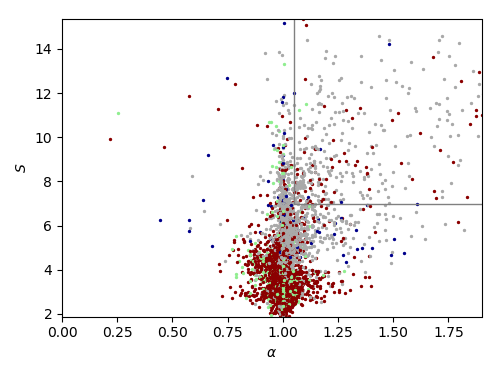

In [14]:
# candidates
fig, ax = plt.subplots(figsize=(5,3.75))

rect = matplotlib.patches.Rectangle((1.05,7),3,20, linewidth=1,edgecolor='grey',facecolor='none')
ax.add_patch(rect)
# rect = matplotlib.patches.Rectangle((1.2,5),3,20,linewidth=1,edgecolor='grey',facecolor='none')
# ax.add_patch(rect)

# # ax.scatter(t['alpha'], t['snr'], c='black')
# for j,f in enumerate(data['col1']):
#     kic_no = int(f.split('-')[0].split('kplr')[1])
#     if kic_no not in kic_artefacts and data[j]['col5'] > 1.05 and data[j]['col3'] < -7:
#         ax.scatter(data[j]['col5'], -data[j]['col3'], s=30, c='darkgrey', edgecolors='black')
#     if kic_no in kic_r18:
#         if data[j]['col5'] > 1.05:
#             ax.scatter(data[j]['col5'], -data[j]['col3'], c='black')
# #             ax.text(data[j]['col5'], -data[j]['col3'], f.split('-')[0].split('kplr')[1]+','+str(data[j]['col4']))
            
for row in data:
    if row['col10'] == "gapJustBefore":
        ax.scatter(row['col5'], -row['col3'], s=2, c='darkgrey')
    elif row['col10'] == "gapJustAfter":
        ax.scatter(row['col5'], -row['col3'], s=2, c='pink')
    elif row['col10'] == "end":
        ax.scatter(row['col5'], -row['col3'], s=2, c='lightblue')
    elif row['col10'] == "gap" or row['col10'] == "gapTwoDaysBefore":
        ax.scatter(row['col5'], -row['col3'], s=2, c='orange')
    elif row['col10'] == "point":
        ax.scatter(row['col5'], -row['col3'], s=2, c='darkblue')
    elif row['col10'] == "badIngress" or row['col10'] == "badEgress" or row['col10'] == "differentIngressEgress" or row['col10'] == "badIngress+Egress":
        ax.scatter(row['col5'], -row['col3'], s=2, c='darkred')
    elif row['col10'] == "maybeTransit":
        ax.scatter(row['col5'], -row['col3'], s=2, c='lightgreen')

ax.set_xlim(0,1.9)
ax.set_ylim(5,18.5)
ax.set_xlabel('$\\alpha$')
ax.set_ylabel('$S$')

fig.tight_layout()
# fig.savefig('../test_results/test_results_figs/sector_6_asym_snr_all.pdf')

In [ ]:
# check gapJustBefore tend to be at specific times
data1 = Table.read('all_snr_gt_5.txt', format='ascii') # list of s/n>5 maybeTransits satisfying width criteria
ok = data1['col10'] == 'gapJustBefore'
fig, ax = plt.subplots(figsize=(9.5,5))
ax.scatter(data1['col4'][ok], data1['col3'][ok], s=1)
# ax.scatter(t['day'], -t['snr'], c='black')
fig.tight_layout()

In [ ]:
ok = (data['col5'] > 1.05) & (data['col3'] < -7)
# ok = (data['col3'] > -5.1) & (data['col3'] < -5)
print('in region:{}'.format(np.sum(ok)))
keep = []
for i,row in enumerate(data[ok]):
    print(row)
    kic_no = int(row['col1'].split('-')[0].split('kplr')[1])
    if kic_no in kic_artefacts:
        print('artefact')
    else:
        fit_one(kic_no, row['col4'], drop_bad_points=True, #width=8, ylim=(0.9982, 1.00035),
                file='figs/kic{}-{:04.0f}.pdf'.format(kic_no,row['col4']))
        keep.append(i)

In [ ]:
t_paper = data[ok][keep]
t_paper.keep_columns(['col1','col3','col4','col5','col6','col7','col9'])
ascii.write(t_paper, format='latex')

In [ ]:
# take a look at full quarters with dips
for i,row in enumerate(data[ok]):
    print(row)
    kic_no = int(row['col1'].split('-')[0].split('kplr')[1])
    if kic_no in kic_artefacts:
        print('artefact')
    else:
        star = kic.star(kic_no)
        lcs = star.get_light_curves()
        i = np.where(tools.d2q(row['col4']) == np.array([l.sci_data_quarter for l in lcs]))[0][0]
        time, timestep, flux, flux_ls, quality, real = get_lc(lcs[i].filename,
                                                           drop_bad_points=True,
                                                           keep_interpolated=True)

        fig, ax = plt.subplots(figsize=(9.5,3), sharex=True)
        ax.plot(time, flux_ls+1.0, '-')

In [ ]:
dr2 = Table.read('dr2.xml')

In [21]:
pl = Table.read('young-cl.xml')

<IPython.core.display.Javascript object>


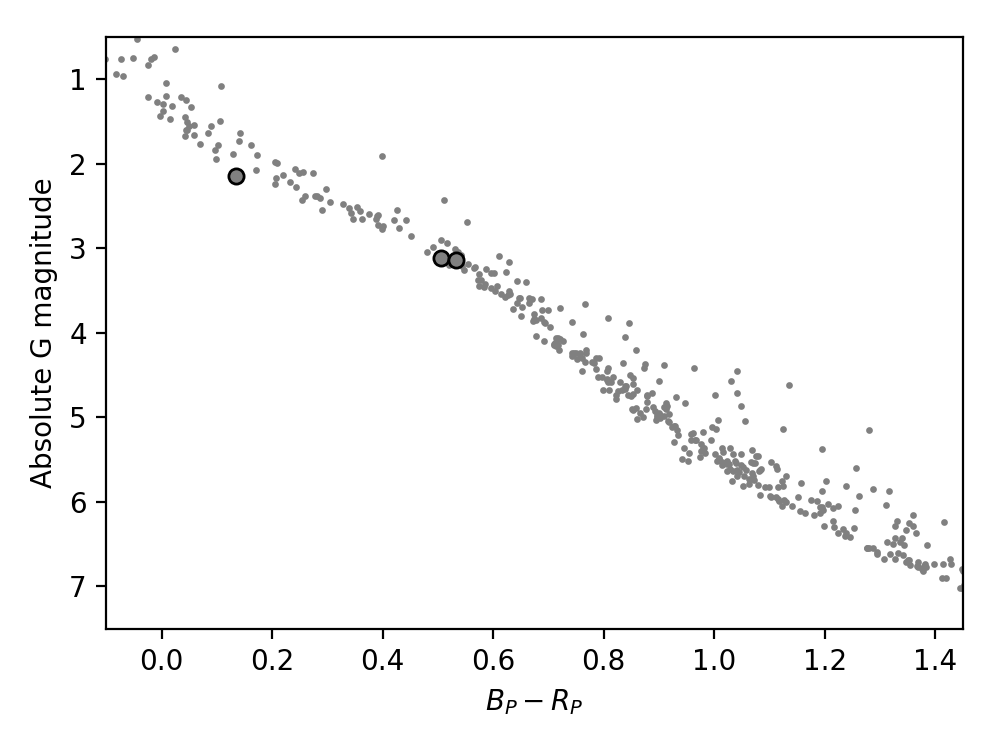

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


In [22]:
fig, ax = plt.subplots(figsize=(5,3.75))

# uncomment one of these
# ax.scatter(dr2['bp_rp'], dr2['phot_g_mean_mag'] - 5*(np.log10(1e3/dr2['parallax'])-1),
#            s=2, color='grey')
ax.scatter(pl['bp_rp'], pl['phot_g_mean_mag'] - 5*(np.log10(1e3/pl['parallax'])-1),
           s=2, color='grey')

for id1 in [2052852775308914176,2129671009876558336,2126145052183993344]:
    ok = dr2['source_id'] == id1
    ax.scatter(dr2[ok]['bp_rp'], dr2[ok]['phot_g_mean_mag'] - 5*(np.log10(1e3/dr2[ok]['parallax'])-1),
              color='grey', s=30, edgecolors='black')
    
ax.set_ylim(7.5,0.5)
ax.set_xlim(-0.1,1.45)
ax.set_xlabel('$B_P - R_P$')
ax.set_ylabel('Absolute G magnitude')

fig.tight_layout()
fig.savefig('figs/hr.pdf')